# **Image Color Reduction using K-Means Clustering**

This notebook demonstrates how to reduce the number of colors in an image using the K-means clustering algorithm. The process involves:

1. Loading and displaying the original image
2. Converting the image pixels into a format suitable for clustering 
3. Applying K-means clustering to find dominant colors
4. Reconstructing the image using only the cluster centroids as colors

## Setup

Import required libraries for image processing and visualization:
- NumPy for numerical operations
- Matplotlib for image loading and display

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Load and Display Original Image

Load the source image and display it to visualize what we're starting with. The shape output shows the dimensions:
- Height: number of pixels vertically
- Width: number of pixels horizontally 
- Channels: RGB color components (3 values)

(200, 329, 3)


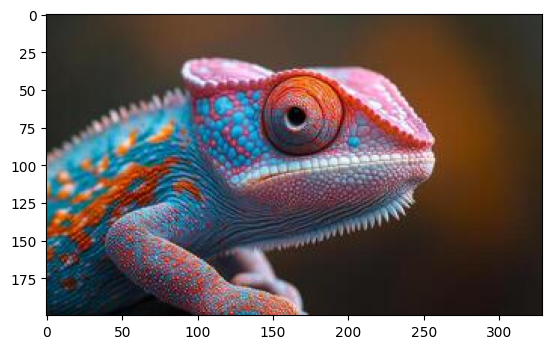

In [16]:
img = plt.imread('img.jpg')

print(img.shape)
plt.imshow(img)
plt.show()

## Helper Functions

Define utility functions needed for the K-means clustering algorithm:

### Euclidean Distance
Calculate the distance between two points in n-dimensional space

In [17]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))

### Initialize Centroids
Randomly select k initial centroids from the data points

In [18]:
def define_centroids(X, k):
    X = np.array(X)
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    return centroids

### Cluster Assignment and Update
Two core functions for K-means:
- `assign_clusters`: Assign each point to nearest centroid
- `update_centroids`: Recalculate centroids based on cluster assignments

In [19]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    n_features = X.shape[1]
    new_centroids = np.zeros((k, n_features))
    for i in range(k):
        points_in_cluster = X[np.array(clusters) == i]
        if len(points_in_cluster) > 0:
            new_centroids[i] = points_in_cluster.mean(axis=0)
    return new_centroids

### K-means Implementation
Main clustering function that:
1. Initializes random centroids
2. Iteratively assigns points to clusters and updates centroids
3. Continues until convergence or max iterations reached

In [20]:
def kmeans(data, number_of_clusters):

    X = np.array(data)
    
    centroids = define_centroids(X, number_of_clusters)

    for _ in range(100):  
        
        clusters = assign_clusters(X, centroids)
        
        new_centroids = update_centroids(X, clusters, number_of_clusters)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

## Apply Color Reduction
Process:
1. Reshape image pixels into 2D array (each row is an RGB color)
2. Apply K-means clustering to find k dominant colors
3. Replace each pixel's color with its cluster centroid
4. Reshape back into original image dimensions
5. Display the color-reduced image

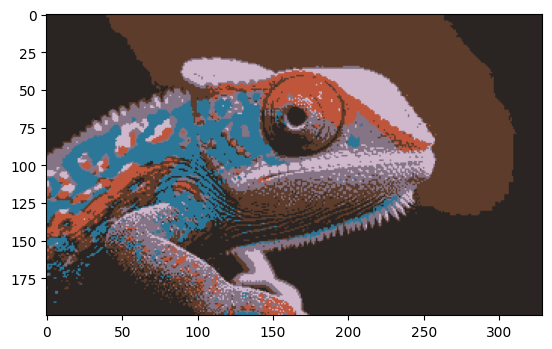

In [14]:
pixels = img.flatten().reshape(-1, 3)

centroids, clusters = kmeans(pixels, 6)

for i in range(len(centroids)):

    pixels[clusters == i] = centroids[i]

pixels = pixels.reshape(img.shape)

plt.imshow(pixels)
plt.show()

We successfully implemented color reduction using K-means clustering to reduce an image to 6 dominant colors. The algorithm:
- Treated each pixel as a point in RGB color space
- Clustered similar colors together
- Replaced original pixels with cluster centers

### Key Techniques Used
- K-means clustering for color grouping
- Euclidean distance for color similarity
- NumPy for efficient array operations
- Matplotlib for image processing